
# Handling Long Sequences with Transformers in Python using PyTorch and Hugging Face

Transformers have revolutionized the field of Natural Language Processing (NLP) with their ability to efficiently handle sequences of data. However, they traditionally struggle with long sequences due to quadratic memory and computational requirements with respect to sequence length. This tutorial will guide you through handling long sequences with Transformers in Python, using PyTorch and Hugging Face libraries. We'll implement techniques to make Transformers more memory-efficient, allowing them to handle longer sequences.

## Environment Setup
First, ensure you have a Python environment ready. This tutorial is designed to be run on Google Colab, which provides a hosted Python environment with most necessary libraries pre-installed.

## Installing Required Libraries

In [1]:
!pip install -q torch
!pip install -q transformers

# Verify installation and version
import torch
import transformers
print("Torch version:", torch.__version__)
print("Transformers version:", transformers.__version__)

Torch version: 2.1.0+cu121
Transformers version: 4.35.2


## Understanding the Challenge with Long Sequences
Traditional Transformers use self-attention mechanisms where each token in the input sequence attends to every other token. This mechanism leads to a quadratic increase in memory and computation with respect to the sequence length, making it impractical for very long sequences.

## Visualizing Self-Attention
Let's visualize this with a simple example:##

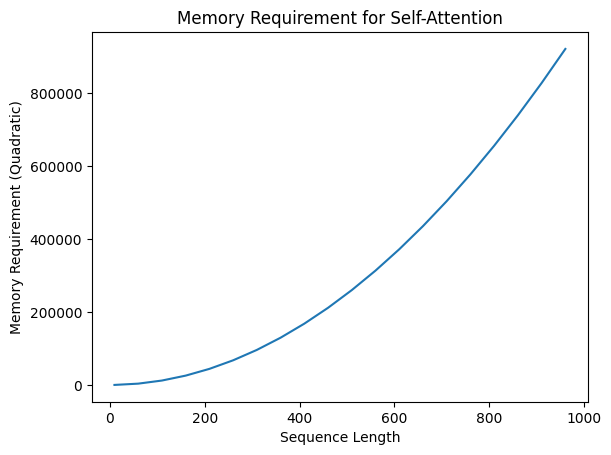

In [2]:
import matplotlib.pyplot as plt
import numpy as np

seq_length = np.arange(10, 1000, 50)
memory_requirement = np.square(seq_length)

plt.plot(seq_length, memory_requirement)
plt.xlabel('Sequence Length')
plt.ylabel('Memory Requirement (Quadratic)')
plt.title('Memory Requirement for Self-Attention')
plt.show()

## Addressing the Challenge
To handle long sequences, we can use techniques like:

*   Gradient checkpointing: Reduces memory usage by recomputing intermediate activations during the backward pass.
* Sparse attention: Reduces the number of attended positions.

## Implementing Gradient Checkpointing
PyTorch provides native support for gradient checkpointing. Here's how to implement it:

In [3]:
from torch.utils.checkpoint import checkpoint

class CheckpointedTransformerLayer(torch.nn.Module):
    def __init__(self, layer):
        super().__init__()
        self.layer = layer

    def forward(self, x):
        # Use checkpointing to save memory
        return checkpoint(self.layer, x)

# Example usage with a Transformer encoder layer
encoder_layer = torch.nn.TransformerEncoderLayer(d_model=512, nhead=8)
checkpointed_layer = CheckpointedTransformerLayer(encoder_layer)

## Implementing Sparse Attention
Hugging Face provides Transformer models with sparse attention patterns. Here's an example using a pre-trained model:

In [4]:
from transformers import LongformerModel, LongformerTokenizer

tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
model = LongformerModel.from_pretrained('allenai/longformer-base-4096')

# Tokenize and prepare inputs
inputs = tokenizer("Example input text", return_tensors="pt")
outputs = model(**inputs)

print(outputs)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

LongformerBaseModelOutputWithPooling(last_hidden_state=tensor([[[-0.0323,  0.0831, -0.0365,  ..., -0.0812, -0.0356, -0.0166],
         [-0.1171,  0.1471, -0.0084,  ..., -0.1100, -0.0824,  0.2215],
         [ 0.0979, -0.1592, -0.0023,  ..., -0.3092, -0.0605,  0.1857],
         [ 0.0779, -0.2146,  0.0085,  ..., -0.0560, -0.1477,  0.1333],
         [-0.0302,  0.0828, -0.0489,  ..., -0.0943, -0.0333, -0.0254]]],
       grad_fn=<SliceBackward0>), pooler_output=tensor([[ 1.5918e-01, -2.6744e-01,  1.1103e-01,  3.0284e-02,  3.3299e-01,
         -2.0941e-01, -4.8300e-01, -4.2719e-01, -9.5533e-02, -2.8054e-01,
         -3.7817e-01, -1.6290e-01,  1.9619e-01, -3.2068e-01,  7.3575e-02,
         -1.2857e-01, -3.8053e-01, -8.1762e-02, -1.0745e-01, -5.2473e-02,
         -1.8308e-02, -3.3848e-03, -2.3131e-01,  2.9041e-03, -4.1583e-01,
         -6.8795e-03, -1.9678e-01, -2.6703e-01,  2.2136e-01,  2.0766e-01,
         -4.1735e-02,  2.7975e-02, -3.4650e-01,  1.2262e-02, -8.5893e-02,
          2.4101e-01, 

## Unified End-to-End Example
Now, let's put everything together in a unified script:

In [5]:
import random

# Sample sentences to build the long text
sample_sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "A journey of a thousand miles begins with a single step.",
    "To be or not to be, that is the question.",
    "All that glitters is not gold.",
    "The only thing we have to fear is fear itself.",
    "Ask not what your country can do for you; ask what you can do for your country.",
    "I think, therefore I am.",
    "The best way to predict the future is to invent it.",
    "That's one small step for man, one giant leap for mankind.",
    "In the beginning, God created the heavens and the earth."
]

# Function to generate a long text
def generate_long_text(sentence_list, length=4000):
    text = ""
    while len(text) < length:
        text += random.choice(sentence_list) + " "
    return text

# Generate the long text
long_text = generate_long_text(sample_sentences)

# Use the generated text
long_text = long_text[:4096]  # Trim to 4096 characters if it exceeds

print(f"Generated text (length {len(long_text)}):")
print(long_text)

Generated text (length 4022):
The best way to predict the future is to invent it. All that glitters is not gold. The only thing we have to fear is fear itself. The best way to predict the future is to invent it. The only thing we have to fear is fear itself. The best way to predict the future is to invent it. In the beginning, God created the heavens and the earth. That's one small step for man, one giant leap for mankind. The best way to predict the future is to invent it. All that glitters is not gold. I think, therefore I am. The only thing we have to fear is fear itself. To be or not to be, that is the question. That's one small step for man, one giant leap for mankind. The only thing we have to fear is fear itself. In the beginning, God created the heavens and the earth. The quick brown fox jumps over the lazy dog. I think, therefore I am. That's one small step for man, one giant leap for mankind. I think, therefore I am. I think, therefore I am. A journey of a thousand miles begi

In [6]:
# Imports
import torch
from transformers import LongformerModel, LongformerTokenizer
from torch.utils.checkpoint import checkpoint

# Model and Tokenizer Initialization
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
model = LongformerModel.from_pretrained('allenai/longformer-base-4096')


# Tokenize Text
inputs = tokenizer(long_text, return_tensors="pt", padding=True, truncation=True, max_length=4096)

# Forward Pass with Gradient Checkpointing
with torch.no_grad():
    outputs = model(**inputs)

# Print Output
print(outputs.last_hidden_state)

# Check Versions
print("Torch version:", torch.__version__)
print("Transformers version:", transformers.__version__)

tensor([[[-0.0958,  0.1034,  0.0049,  ..., -0.0849, -0.0245, -0.0389],
         [-0.0694, -0.1460,  0.0585,  ..., -0.3838, -0.0285,  0.0217],
         [-0.0081, -0.0446,  0.1138,  ...,  0.2776, -0.0648,  0.2564],
         ...,
         [-0.0941,  0.0828, -0.0092,  ..., -0.0955, -0.0195, -0.0169],
         [-0.1205, -0.2418,  0.0104,  ...,  0.0536, -0.0796,  0.4789],
         [-0.0367, -0.0419,  0.1696,  ...,  0.1541, -0.0937,  0.3124]]])
Torch version: 2.1.0+cu121
Transformers version: 4.35.2


## Conclusion
In this tutorial, we've covered how to handle long sequences with Transformers using PyTorch and Hugging Face, focusing on techniques like gradient checkpointing and sparse attention. This approach enables the processing of longer sequences than traditional Transformer models could handle, opening new possibilities in NLP tasks.